In [154]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# Create or connect to an SQLite database
conn = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [156]:
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

print("Cursor Created")

Cursor Created


In [158]:
cursor.execute("DROP TABLE IF EXISTS students;")
conn.commit()

In [160]:
# Create the students table if it doesn't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS students 
(student_id INTEGER PRIMARY KEY,
first_name TEXT,
last_name TEXT)''')

conn.commit()

print("Students table created")

Students table created


In [162]:
cursor.execute("DROP TABLE IF EXISTS grades;")
conn.commit()

In [164]:
# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER Primary Key,
    student_id INTEGER,
    subject TEXT,
    grade Integer
)
''')

print("Grades table created!")

Grades table created!


In [166]:
students_data = [
    (1, 'Alice', 'Johnson'), 
    (2, 'Bob', 'Smith'), 
    (3, 'Carol', 'White'), 
    (4, 'David', 'Brown'), 
    (5, 'Eve', 'Davis')]

#insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES(?, ?, ?)
''', students_data)

#commit the transation
conn.commit()

print("Data inserted into the students table")

Data inserted into the students table


In [168]:
grades_data = [
    (1, 'Math', 90), 
    (1, 'English', 87), 
    (1, 'History', 87), 
    (2, 'Math', 91),
    (2, 'English', 88),
    (2, 'History', 83),
    (3, 'Math', 79),
    (3, 'English', 80),
    (3, 'History', 75),
    (4, 'Math', 96),
    (4, 'English', 91),
    (4, 'History', 90),
    (5, 'Math', 89),
    (5, 'English', 82),
    (5, 'History', 84)]

#insert data into the table
cursor.executemany('''
INSERT INTO grades ( student_id, subject, grade) VALUES(?, ?, ?)
''', grades_data)

#commit the transation
conn.commit()

print("Data inserted into the grades table")

Data inserted into the grades table


In [170]:
# Fetch all data from the sales table
cursor.execute("SELECT students.first_name, students.last_name, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id ")
rows = cursor.fetchall()

# Print the results
print("All Students data:")
for row in rows:
    print(row)

All Students data:
('Alice', 'Johnson', 90)
('Alice', 'Johnson', 87)
('Alice', 'Johnson', 87)
('Bob', 'Smith', 91)
('Bob', 'Smith', 88)
('Bob', 'Smith', 83)
('Carol', 'White', 79)
('Carol', 'White', 80)
('Carol', 'White', 75)
('David', 'Brown', 96)
('David', 'Brown', 91)
('David', 'Brown', 90)
('Eve', 'Davis', 89)
('Eve', 'Davis', 82)
('Eve', 'Davis', 84)


In [172]:
cursor.execute("SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students JOIN grades ON students.student_id = grades.student_id GROUP BY students.first_name, students.last_name")
rows = cursor.fetchall()

print("Student Average Grade:")
for row in rows:
    print(row)

Student Average Grade:
('Alice', 'Johnson', 88.0)
('Bob', 'Smith', 87.33333333333333)
('Carol', 'White', 78.0)
('David', 'Brown', 92.33333333333333)
('Eve', 'Davis', 85.0)


In [174]:
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
ORDER BY average_grade DESC
LIMIT 1
''')
highest_avg_grade = cursor.fetchone()

# Display the result
print(f"Student with the highest grade: {highest_avg_grade[0]} {highest_avg_grade[1]}")

Student with the highest grade: David Brown


In [176]:
cursor.execute('''
SELECT AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.subject LIKE 'Math'
''')
average_math_grade = cursor.fetchone()

# Display the result
print(f"The average math grade is: {average_math_grade[0]}")

The average math grade is: 89.0


In [178]:
cursor.execute('''SELECT students.first_name, students.last_name, MAX(grades.grade) AS best_grade FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
GROUP BY students.first_name, students.last_name''')
rows = cursor.fetchall()

# Print the results
print("All Above 90 data:")
for row in rows:
    print(row)

All Above 90 data:
('Bob', 'Smith', 91)
('David', 'Brown', 96)


In [180]:
students = pd.read_sql_query('''
SELECT * FROM students
''', conn)
students

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [182]:
grades = pd.read_sql_query('''
SELECT * FROM grades
''', conn)
grades

,grade_id,student_id,subject,grade
0,1,1,Math,90
1,2,1,English,87
2,3,1,History,87
3,4,2,Math,91
4,5,2,English,88
5,6,2,History,83
6,7,3,Math,79
7,8,3,English,80
8,9,3,History,75
9,10,4,Math,96


In [184]:
students_grades = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN grades ON students.student_id = grades.student_id
''', conn)
students_grades

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,90
1,Alice,Johnson,English,87
2,Alice,Johnson,History,87
3,Bob,Smith,Math,91
4,Bob,Smith,English,88
5,Bob,Smith,History,83
6,Carol,White,Math,79
7,Carol,White,English,80
8,Carol,White,History,75
9,David,Brown,Math,96


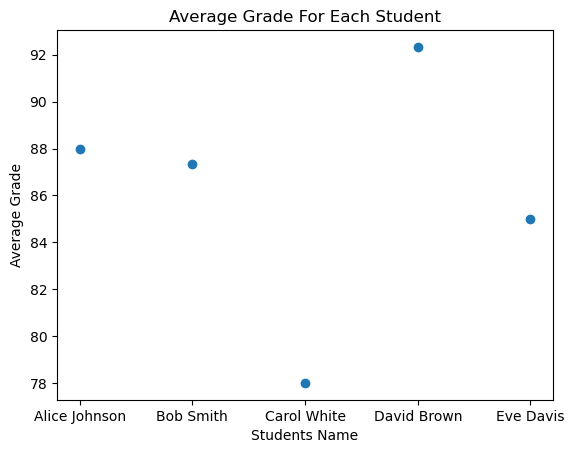

In [197]:
students_average_grade = pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
''', conn)
rows = students_average_grade.values.tolist()
student_names = [f"{row[0]} {row[1]}" for row in rows]
average_grades = [row[2] for row in rows]

plt.scatter(student_names, average_grades)
plt.xlabel('Students Name')
plt.ylabel('Average Grade')
plt.title('Average Grade For Each Student')
plt.show()

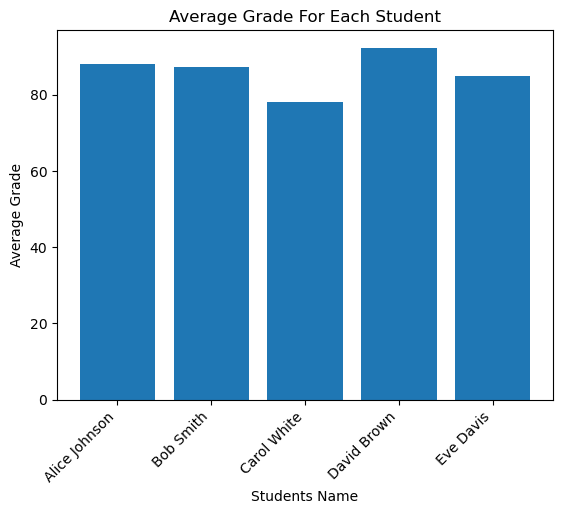

In [201]:
students_average_grade = pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.first_name, students.last_name
''', conn)
rows = students_average_grade.values.tolist()
student_names = [f"{row[0]} {row[1]}" for row in rows]
average_grades = [row[2] for row in rows]

plt.bar(student_names, average_grades)
plt.xlabel('Students Name')
plt.ylabel('Average Grade')
plt.title('Average Grade For Each Student')
plt.xticks(rotation=45, ha='right')
plt.show()